# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | khingansk
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | westport
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | imeni telmana
City not found. Skipping...
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | pokhara
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | carauari
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | puracic
Processing Rec

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,28.09,100,75,3.60,TO,1675236006
1,khingansk,49.1167,131.1833,-20.55,94,99,4.92,RU,1675236007
2,saskylakh,71.9167,114.0833,-25.76,96,100,9.09,RU,1675236008
3,new norfolk,-42.7826,147.0587,18.29,34,4,1.79,AU,1675236008
4,westport,41.1415,-73.3579,-0.25,57,100,4.63,US,1675236011


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,28.09,100,75,3.60,TO,1675236006
1,khingansk,49.1167,131.1833,-20.55,94,99,4.92,RU,1675236007
2,saskylakh,71.9167,114.0833,-25.76,96,100,9.09,RU,1675236008
3,new norfolk,-42.7826,147.0587,18.29,34,4,1.79,AU,1675236008
4,westport,41.1415,-73.3579,-0.25,57,100,4.63,US,1675236011


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

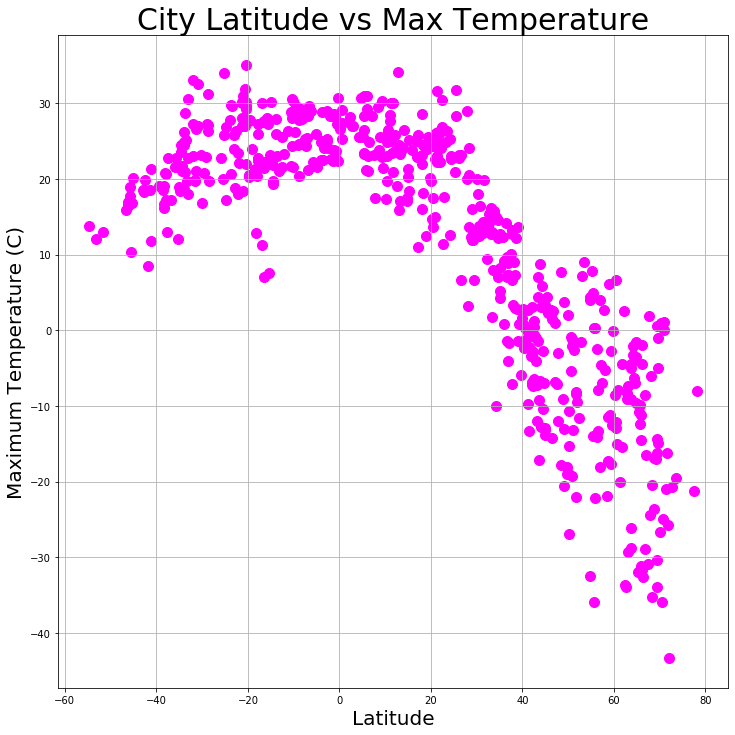

In [38]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(12,12), s=100, c='fuchsia')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Maximum Temperature (C)", fontsize=20)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

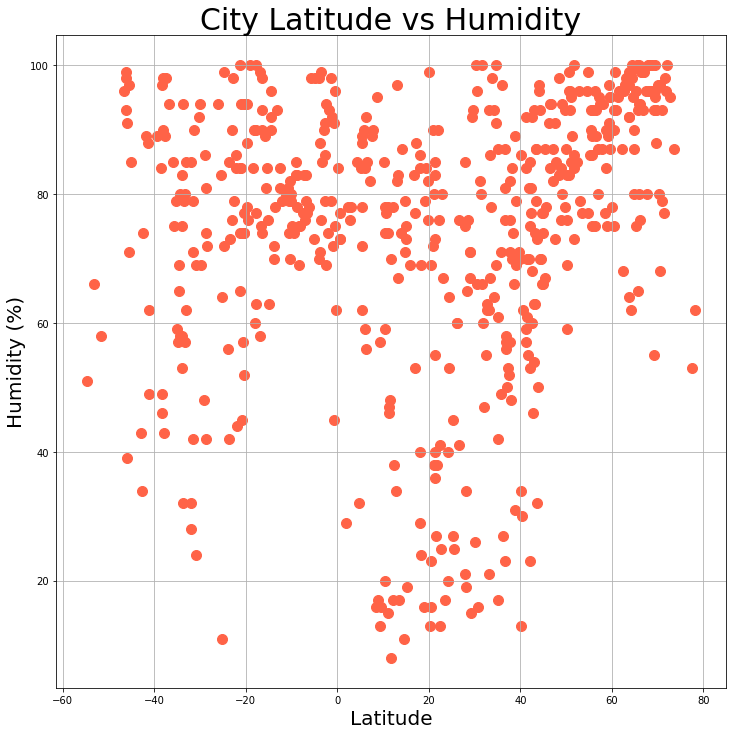

In [39]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(12,12), s=100, c='tomato')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

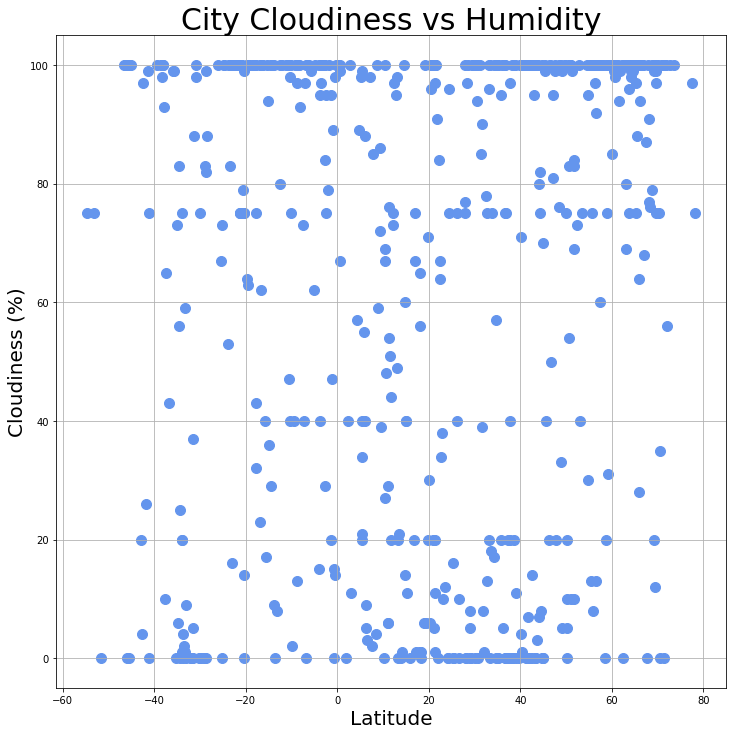

In [40]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(12,12), s=100, c='cornflowerblue')

# Incorporate the other graph properties
plt.title("City Cloudiness vs Humidity", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

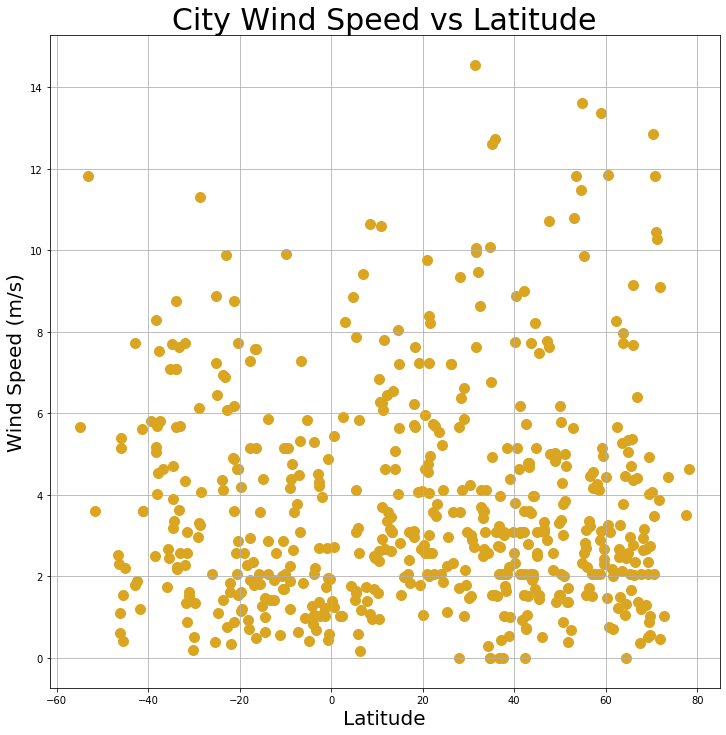

In [41]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(12,12), s=100, c='goldenrod')

# Incorporate the other graph properties
plt.title("City Wind Speed vs Latitude", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (m/s)", fontsize=20)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,khingansk,49.1167,131.1833,-20.55,94,99,4.92,RU,1675236007
2,saskylakh,71.9167,114.0833,-25.76,96,100,9.09,RU,1675236008
4,westport,41.1415,-73.3579,-0.25,57,100,4.63,US,1675236011
5,longyearbyen,78.2186,15.6401,-8.09,62,75,4.63,SJ,1675236012
6,lavrentiya,65.5833,-171.0000,-12.42,100,88,1.66,RU,1675236012


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,28.09,100,75,3.60,TO,1675236006
3,new norfolk,-42.7826,147.0587,18.29,34,4,1.79,AU,1675236008
9,ushuaia,-54.8000,-68.3000,13.81,51,75,5.66,AR,1675236014
12,punta arenas,-53.1500,-70.9167,12.06,66,75,11.83,CL,1675236016
14,carauari,-4.8828,-66.8958,21.51,98,100,0.42,BR,1675236017


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8687.


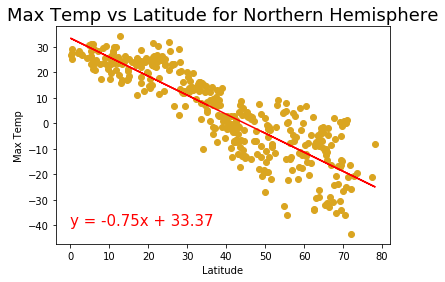

In [49]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Max Temp vs Latitude for Northern Hemisphere", fontsize = 18)
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.4727.


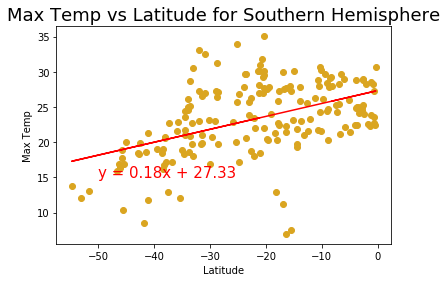

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Max Temp vs Latitude for Southern Hemisphere", fontsize = 18)
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4653.


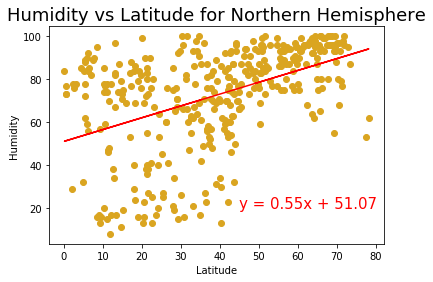

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs Latitude for Northern Hemisphere", fontsize = 18)
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.2283.


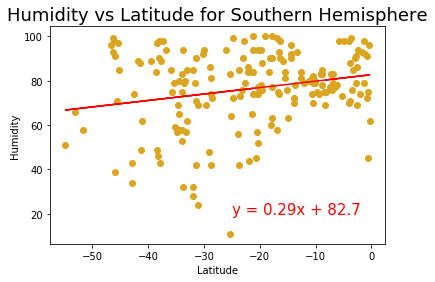

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs Latitude for Southern Hemisphere", fontsize = 18)
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3118.


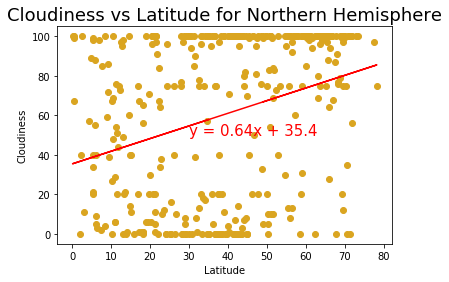

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs Latitude for Northern Hemisphere", fontsize = 18)
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.1784.


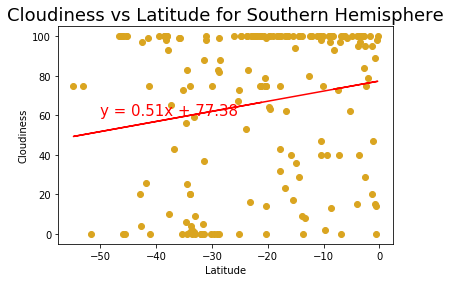

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs Latitude for Southern Hemisphere", fontsize = 18)
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0163.


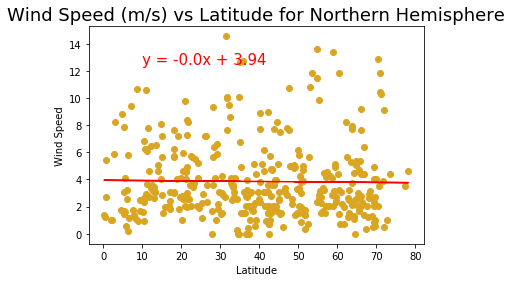

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed (m/s) vs Latitude for Northern Hemisphere", fontsize = 18)
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.2426.


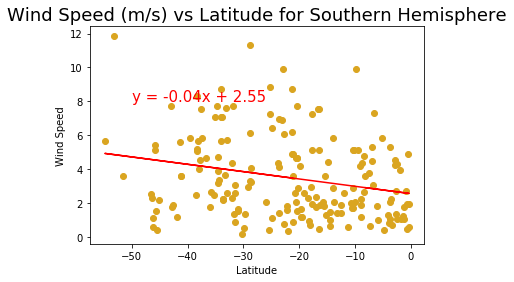

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed (m/s) vs Latitude for Southern Hemisphere", fontsize = 18)
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

**Additional Analysis** 

In [57]:
# look at all correlations within the northern hemisphere dataframe
north_corr = northern_hemi_df.corr()
north_corr.unstack().sort_values()

Lat         Max Temp     -0.868679
Max Temp    Lat          -0.868679
Humidity    Max Temp     -0.450801
Max Temp    Humidity     -0.450801
Cloudiness  Max Temp     -0.191786
Max Temp    Cloudiness   -0.191786
Humidity    Lng          -0.132077
Lng         Humidity     -0.132077
Date        Lat          -0.094572
Lat         Date         -0.094572
Humidity    Date         -0.092854
Date        Humidity     -0.092854
Humidity    Wind Speed   -0.081798
Wind Speed  Humidity     -0.081798
Cloudiness  Date         -0.046073
Date        Cloudiness   -0.046073
Wind Speed  Lat          -0.016276
Lat         Wind Speed   -0.016276
Lng         Lat           0.020064
Lat         Lng           0.020064
Max Temp    Lng           0.031472
Lng         Max Temp      0.031472
Wind Speed  Date          0.052406
Date        Wind Speed    0.052406
            Max Temp      0.116566
Max Temp    Date          0.116566
Cloudiness  Wind Speed    0.119482
Wind Speed  Cloudiness    0.119482
            Max Temp

In [58]:
south_corr = southern_hemi_df.corr()
south_corr.unstack().sort_values()

Humidity    Wind Speed   -0.339916
Wind Speed  Humidity     -0.339916
Lng         Humidity     -0.311432
Humidity    Lng          -0.311432
Max Temp    Humidity     -0.283105
Humidity    Max Temp     -0.283105
Lat         Wind Speed   -0.242623
Wind Speed  Lat          -0.242623
Lat         Lng          -0.196863
Lng         Lat          -0.196863
Cloudiness  Wind Speed   -0.171364
Wind Speed  Cloudiness   -0.171364
Date        Wind Speed   -0.154312
Wind Speed  Date         -0.154312
Cloudiness  Max Temp     -0.022644
Max Temp    Cloudiness   -0.022644
Date        Max Temp      0.020506
Max Temp    Date          0.020506
Lng         Cloudiness    0.066584
Cloudiness  Lng           0.066584
Humidity    Date          0.086826
Date        Humidity      0.086826
Lng         Date          0.092477
Date        Lng           0.092477
            Cloudiness    0.105875
Cloudiness  Date          0.105875
Wind Speed  Lng           0.135216
Lng         Wind Speed    0.135216
Lat         Date    